### Importing Important Libraries

In [238]:
!pip install xgboost

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV,cross_val_score

from sklearn.linear_model import LogisticRegression

### Reading and analysing the Data

In [240]:
df=pd.read_csv("C:\\Users\\VISHVAJEET\\Documents\\student_lifestyle_dataset2.csv")


In [241]:
df.shape

(2000, 8)

In [242]:
df.describe(include='all')

,Student_ID,Study_Hours,Hobbies_Hours,Sleep_Hours,Social_Interaction,Physical_Activity_Hours,CGPA,Stress_Level
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1029
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960,NaN
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674,NaN
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000,NaN
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000,NaN
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000,NaN
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000,NaN


In [243]:
df.isnull().sum()

Student_ID                 0
Study_Hours                0
Hobbies_Hours              0
Sleep_Hours                0
Social_Interaction         0
Physical_Activity_Hours    0
CGPA                       0
Stress_Level               0
dtype: int64

In [244]:
df.dtypes

Student_ID                   int64
Study_Hours                float64
Hobbies_Hours              float64
Sleep_Hours                float64
Social_Interaction         float64
Physical_Activity_Hours    float64
CGPA                       float64
Stress_Level                object
dtype: object

In [245]:
df.drop("Student_ID",axis=1,inplace=True)
df.head()

,Study_Hours,Hobbies_Hours,Sleep_Hours,Social_Interaction,Physical_Activity_Hours,CGPA,Stress_Level
0,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,8.1,0.6,6.5,2.2,6.6,3.51,High


### Converting Categorical column to numerical using Label Encoder

In [246]:
from sklearn.preprocessing import LabelEncoder


l = LabelEncoder()
df['Stress_Level_label'] = l.fit_transform(df['Stress_Level'])



In [247]:
#Checking distribution or how much balance data is
print(df['Stress_Level'].value_counts())
print(df['Stress_Level'].value_counts(normalize=True))  

Stress_Level
High        1029
Moderate     674
Low          297
Name: count, dtype: int64
Stress_Level
High        0.5145
Moderate    0.3370
Low         0.1485
Name: proportion, dtype: float64


### Training and Testing the data using Logistic Regression

In [248]:
X=df.drop(["Stress_Level","Stress_Level_label"],axis=1)
Y=df["Stress_Level_label"]
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=2022)

## Scaling Data

In [249]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [250]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(X_train_scaled, y_train)
log_pred = model.predict(X_test_scaled)
print(classification_report(y_test,log_pred))
cm=confusion_matrix(y_test,log_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       150
           1       0.78      1.00      0.88        47
           2       0.83      0.79      0.81       103

    accuracy                           0.85       300
   macro avg       0.83      0.88      0.85       300
weighted avg       0.85      0.85      0.85       300

[[126   7  17]
 [  0  47   0]
 [ 16   6  81]]


In [251]:
print(model.score(X_test_scaled, y_test)*100,'%')

84.66666666666667 %


## Random Forest

In [252]:
rf = RandomForestClassifier(class_weight='balanced',n_estimators=100)
rf.fit(X_train_scaled, y_train)
print(rf.score(X_test_scaled, y_test)*100,'%')
rf_pred=rf.predict(X_test_scaled)

100.0 %


In [253]:
print(classification_report(y_test,rf_pred))  #It is overfitting

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00       103

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [254]:
cm=confusion_matrix(y_test,rf_pred)
print(cm)

[[150   0   0]
 [  0  47   0]
 [  0   0 103]]


## XGBOOST

In [255]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier(class_weight='balanced')
xgb.fit(X_train_scaled, y_train)
xgb_pred = xgb.predict(X_test_scaled)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred)*100,'%')#It is overfitting
print(classification_report(y_test,xgb_pred))
cm=confusion_matrix(y_test,xgb_pred)
print(cm)

C:\Users\VISHVAJEET\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:23:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 100.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00       103

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

[[150   0   0]
 [  0  47   0]
 [  0   0 103]]


### Analysing Best Model Performance

In [256]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       150
           1       0.78      1.00      0.88        47
           2       0.83      0.79      0.81       103

    accuracy                           0.85       300
   macro avg       0.83      0.88      0.85       300
weighted avg       0.85      0.85      0.85       300



In [257]:
##CONFUSION MATRIX
cm=confusion_matrix(y_test,log_pred)
print(cm)

[[126   7  17]
 [  0  47   0]
 [ 16   6  81]]


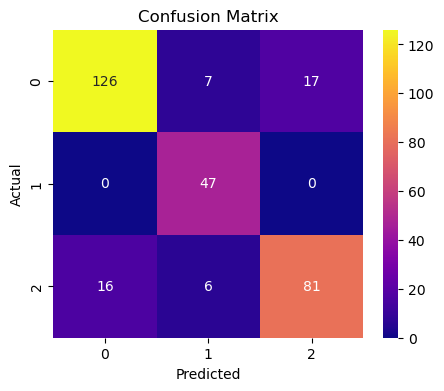

In [258]:
 plt.figure(figsize=(5,4))
 sns.heatmap((cm),annot=True,fmt='d',cmap='plasma')
 plt.xlabel('Predicted')
 plt.ylabel('Actual')
 plt.title('Confusion Matrix')
plt.show()
                      
                      
                      
           

In [259]:
from sklearn.metrics import mean_squared_error,r2_score
mse= mean_squared_error(y_test,log_pred)
rmse=np.sqrt(mse)
r2= r2_score(y_test,log_pred)
print(rmse)
print(r2)

0.695221787153807
0.4096972493248837


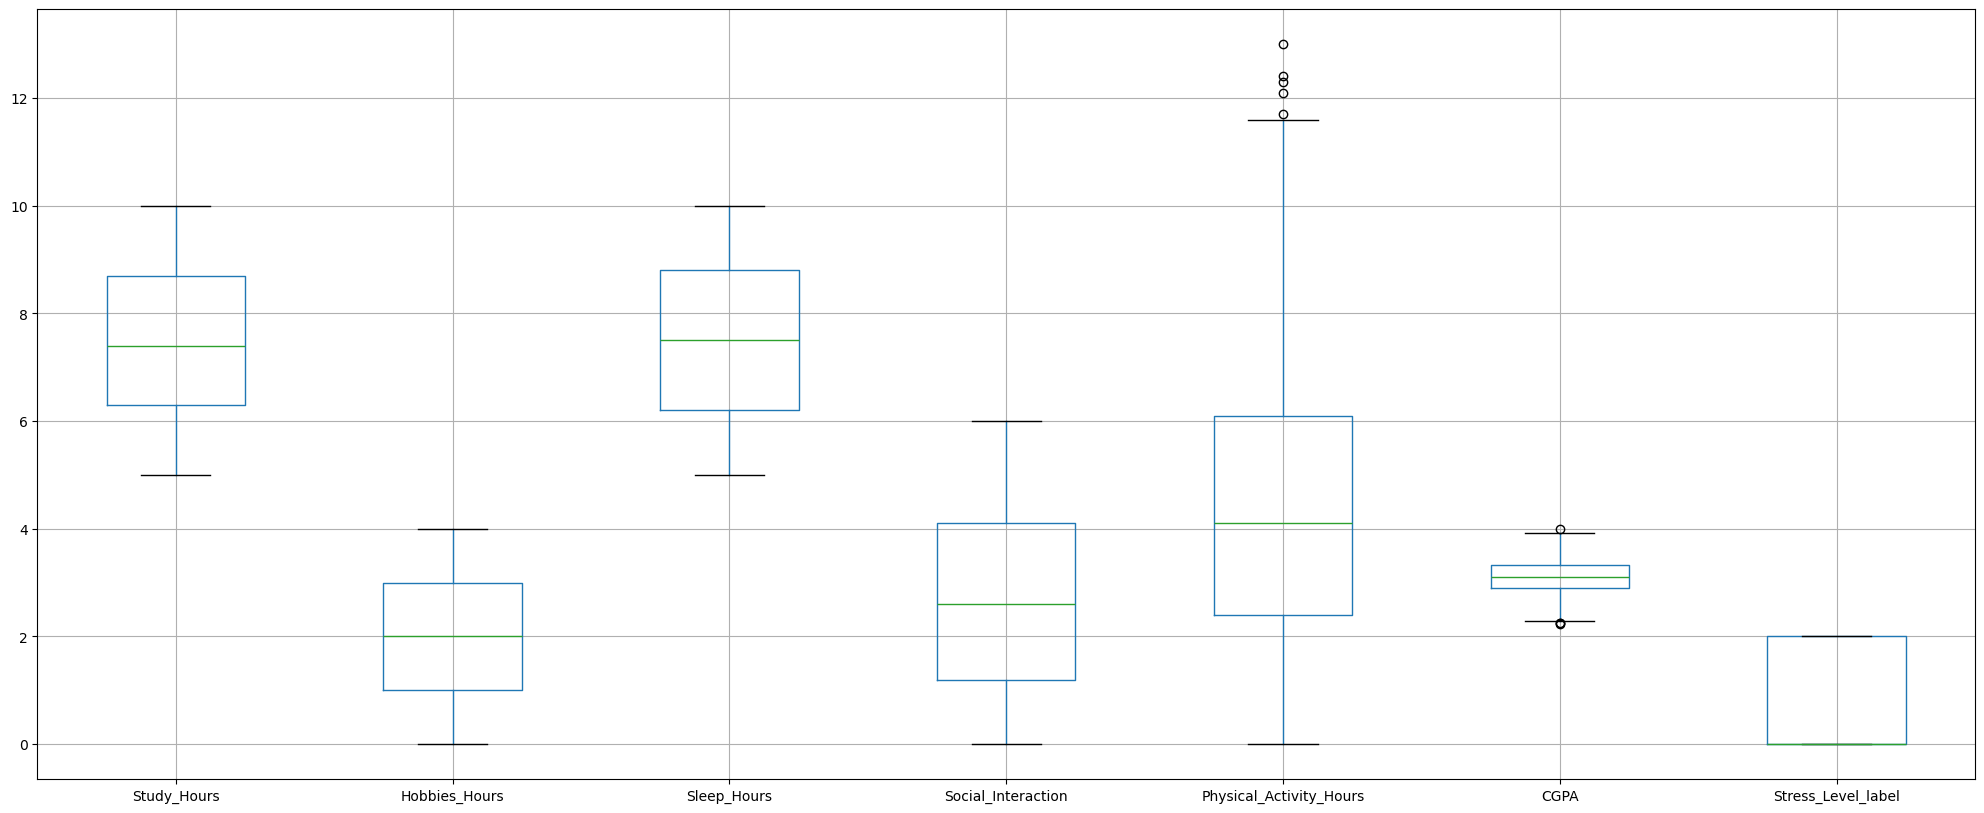

In [260]:
plt.figure(figsize=(25,10))
df.select_dtypes(include='number').boxplot()
plt.show()

In [261]:
##Converting numerical back to categorical
predicted_labels = l.inverse_transform(log_pred)


In [262]:
import joblib


joblib.dump(model, "model.pkl")

['model.pkl']